In [1]:
import math
import copy
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error, r2_score
from pprint import pprint
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

# Clustering with kmeans

## Download California housing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
c_df = california_housing.frame
c_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Choose appropriate features
- Pick just the "Longitude", "Latitude" and "MedHouseVal" columns of the dataset

In [3]:
feature_columns = ['Longitude', 'Latitude', 'MedHouseVal']
X_df = c_df[feature_columns]

## Implement kmeans using sklearn
- You will be using the default initialization for kmeans namely: "kmeans++"
- The following will be done in a single for statement
  - You are going to train 6 k-means clustering algorithms with different k's. Specifically k=[5, 6, 7, 8, 9, 10]
  - You will print the following:
    - The plots for each k
    - These will be seaborn scatterplots
    - You will create 6 subplots
    - The Latitude will be the y's
    - The Longitude's will be the x's
    - Use random_state=0
    - The MedianHouseValue will serve as the size of each point to let us know which clusters have the houses with the highest value
      - Bigger points will mean bigger MedianHouseValue
    - The inertia for each k (grab these in a list, you will need them later for plotting)
    - The Silhoutte score for each k (grab these in a list, you will need them later plotting) 

Inertia for k: 24564.8722232935
silhouette_score for k: 0.4431691617661618
Inertia for k: 20940.28278749702
silhouette_score for k: 0.4125422481267864
Inertia for k: 17586.94709621131
silhouette_score for k: 0.4120141057231228
Inertia for k: 15349.528106571752
silhouette_score for k: 0.4045329003429661
Inertia for k: 13564.129356771416
silhouette_score for k: 0.38289847620100226
Inertia for k: 12518.135931292321
silhouette_score for k: 0.39115572741192267


Text(0.5, 1.0, 'k = 10')

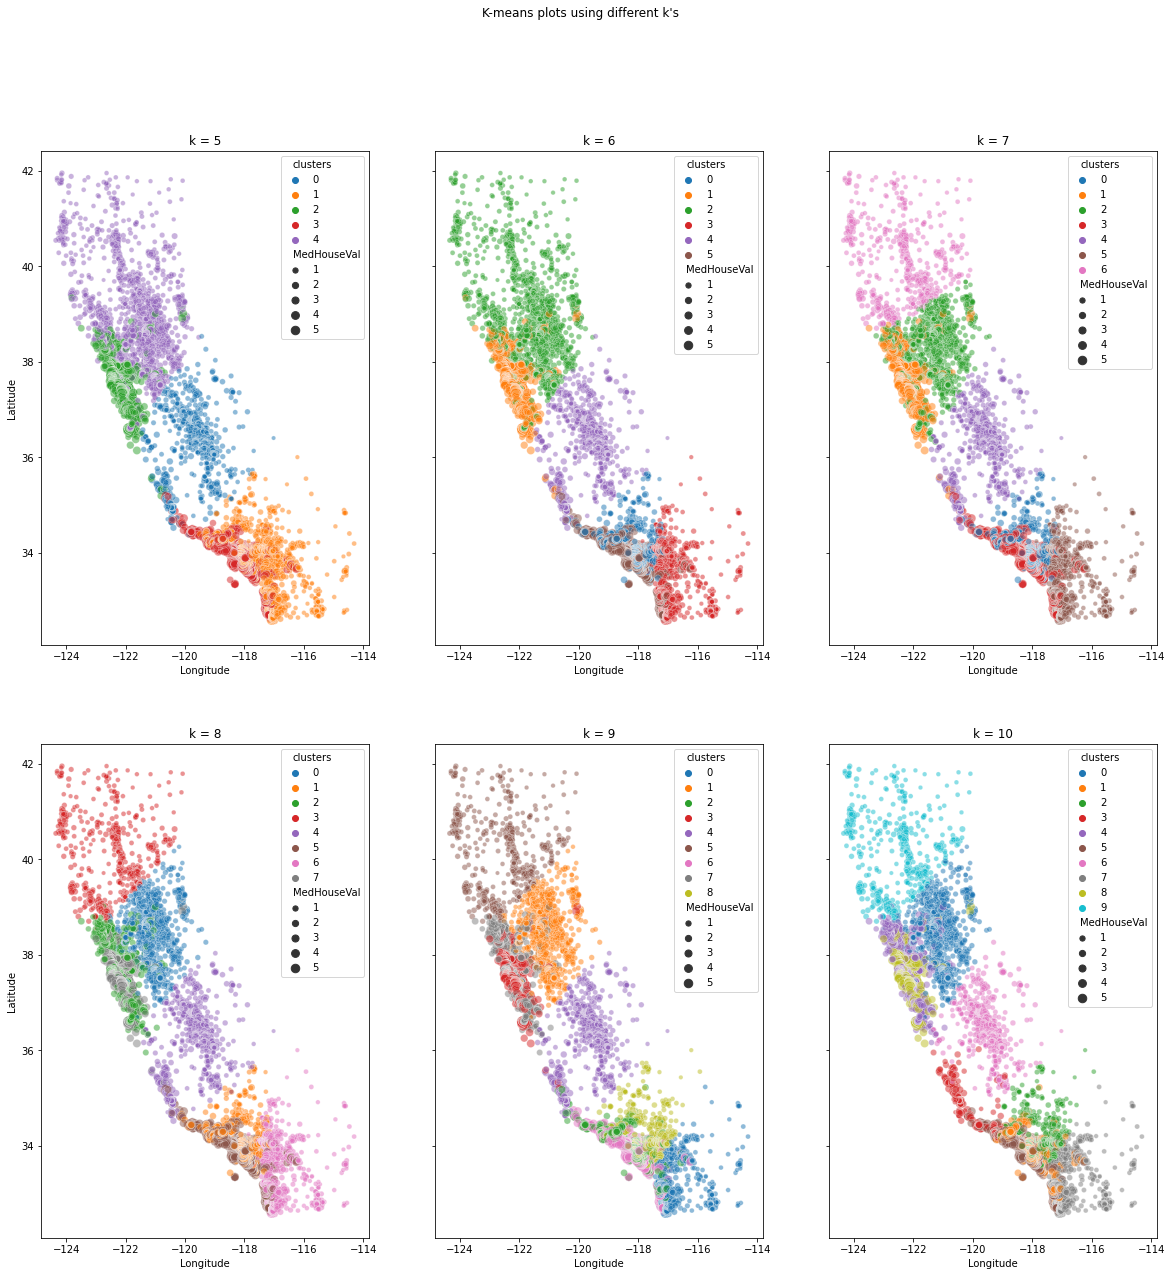

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k=[5, 6, 7, 8, 9, 10]
l_inertia = []
l_silhouette = []
fig, axes = plt.subplots(2, 3, figsize=(20, 20), sharey=True)
fig.suptitle("K-means plots using different k's")
for j in range(len(k)):
#for j in k :
    kmeans = KMeans(n_clusters=k[j], random_state=0, init="k-means++")
    kmeans.fit(X_df)
    clusters = kmeans.predict(X_df)
    inertia = kmeans.inertia_
    print(f"Inertia for k: {inertia}")
    l_inertia.append(inertia)
    
    silhouette = silhouette_score(X_df, clusters)
    l_silhouette.append(silhouette)
    print(f"silhouette_score for k: {silhouette}")
    X_df_w_clusters_6 = copy.deepcopy(X_df)
    X_df_w_clusters_6["clusters"] = clusters
 #j-5  ->from where to start
    sns.scatterplot(ax=axes.flatten()[j], data=X_df_w_clusters_6, x="Longitude", y="Latitude", size="MedHouseVal", hue="clusters", 
                    palette="tab10", alpha=0.5)
    # ***Note***: In your case, you would be doing axes[x][y] because you have more than 1 row and more than 1 column. So your plot for k=5 should be at axes[0][0]
axes[0][0].set_title(f"k = {5}")
axes[0][1].set_title(f"k = {6}")
axes[0][2].set_title(f"k = {7}")
axes[1][0].set_title(f"k = {8}")
axes[1][1].set_title(f"k = {9}")
axes[1][2].set_title(f"k = {10}")
    

## Plot the inertia's against k's

Text(0, 0.5, 'Inertia')

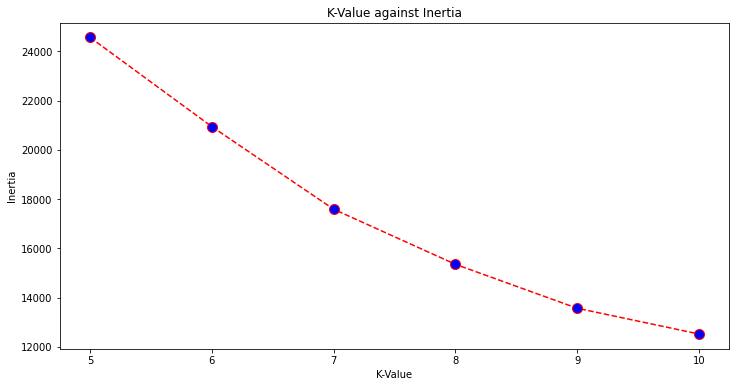

In [5]:
import matplotlib.pyplot as plt 
k=[5, 6, 7, 8, 9, 10]
plt.figure(figsize=(12, 6))
plt.plot(range(5,11), l_inertia, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K-Value against Inertia')
plt.xlabel('K-Value')
plt.ylabel('Inertia')

## Plot the silhoutte score against k's

Text(0, 0.5, 'Silhouette')

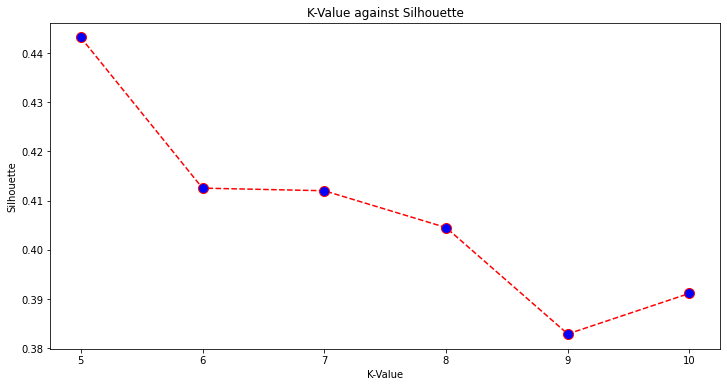

In [6]:
import matplotlib.pyplot as plt 
k=[5, 6, 7, 8, 9, 10]
plt.figure(figsize=(12, 6))
plt.plot(range(5,11), l_silhouette, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K-Value against Silhouette')
plt.xlabel('K-Value')
plt.ylabel('Silhouette')



# Dimensionality reduction with PCA

## Download Breast Cancer dataset from sklearn

In [7]:
from sklearn.datasets import load_breast_cancer

breast_cancer= load_breast_cancer(as_frame=True)
b_df = breast_cancer.frame
b_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [8]:
b_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [9]:
feature_columns = b_df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']]
target_column = b_df['target']

X_clf = feature_columns
y_clf = target_column

#smth=b_df.drop(['target'])

In [10]:
X_clf

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Implement pca using sklearn

In [11]:
# Remember to scale your features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaler = StandardScaler()
scaler.fit(X_clf) 
X_scaled = scaler.transform(X_clf)


## Perform feature scaling using StandardScaler before applying PCA
 - Print the shape of your scaled data

In [12]:
# Here is how to print the shape of an array
print(f"The shape of X_scaled which will be used to fit pca is: {X_scaled.shape}")

The shape of X_scaled which will be used to fit pca is: (569, 30)


In [13]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [14]:
X_pca = pca.transform(X_scaled)
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

## Reduce all features to 2 components
    - Plot a 2D graph with pc1 as x-axis and pc2 as the y-axis
       - Use different points and colors for the "benign" and "malignant" points
     

In [15]:
ex_variance_ratio=pca.explained_variance_ratio_
print(f"explained variance ratio is:{np.sum(ex_variance_ratio)}")

explained variance ratio is:0.6324320765155942


In [16]:
from sklearn.metrics import mean_squared_error
X_approx = pca.inverse_transform(X_pca)
print(f"The size of my reconstructed array is {X_approx.shape}")
print(f"The mse between my reconstructed data and the data it was fit on is: {mean_squared_error(X_scaled, X_approx)}")

The size of my reconstructed array is (569, 30)
The mse between my reconstructed data and the data it was fit on is: 0.3675679234844056


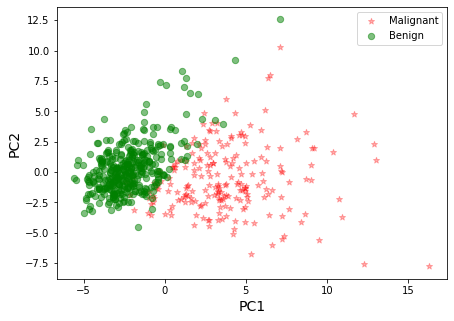

In [17]:
pc1_ax=X_pca[:,0]
pc2_ax=X_pca[:,1]
cdict={0:'red',1:'green'}
labl = {0:'Malignant',1:'Benign'}
marker={0:'*',1:'o'}

alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(y_clf):
 ix=np.where(y_clf==l)
 ax.scatter(pc1_ax[ix],pc2_ax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])
    
# for loop ends
plt.xlabel("PC1",fontsize=14)
plt.ylabel("PC2",fontsize=14)
plt.legend()
plt.show()

### Print the explained variance ratio

In [18]:
ex_variance_ratio=pca.explained_variance_ratio_
print(f"explained variance ratio is:{np.sum(ex_variance_ratio)}")

explained variance ratio is:0.6324320765155942


### Reconstruct back to original dimension
- Print shape of the reconstructed data
- Get mse between reconstructed data and scaled data Hint: It should be less than 0.4. Around 0.36

In [19]:
from sklearn.metrics import mean_squared_error
X_approx = pca.inverse_transform(X_pca)
print(f"The size of my reconstructed array is {X_approx.shape}")
print(f"The mse between my reconstructed data and the data it was fit on is: {mean_squared_error(X_scaled, X_approx)}")

The size of my reconstructed array is (569, 30)
The mse between my reconstructed data and the data it was fit on is: 0.3675679234844056


## Reduce all features to 3 components
    - Plot a 3D graph with pc1 as the x-axis, pc2 as the y-axis and pc3 as the z-axis
      - Use different points and colors for the "benign" and "malignant" points

explained variance ratio is:0.7263637090893822


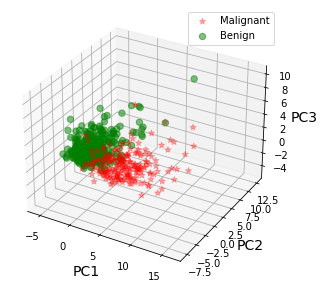

In [20]:
pca = PCA(n_components=3)
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) 

ex_variance_ratio=pca.explained_variance_ratio_
print(f"explained variance ratio is:{np.sum(ex_variance_ratio)}")


pc1_ax = X_pca[:,0]
pc2_ax = X_pca[:,1]
pc3_ax = X_pca[:,2]

cdict = {0:'red',1:'green'}
labl = {0:'Malignant',1:'Benign'}
marker = {0:'*',1:'o'}
alpha = {0:.3, 1:.5}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y_clf):
 ix=np.where(y_clf==l)
 ax.scatter(pc1_ax[ix], pc2_ax[ix], pc3_ax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_zlabel("PC3", fontsize=14)

ax.legend()
plt.show()

### Print the explained variance ratio

In [21]:
ex_variance_ratio=pca.explained_variance_ratio_
print(f"explained variance ratio is:{np.sum(ex_variance_ratio)}")

explained variance ratio is:0.7263637090893822


### Reconstruct back to original dimension
- Print shape of the reconstructed data
- Get mse between reconstructed data and scaled data Hint: It should be less than 0.4. Around 0.36

In [22]:
from sklearn.metrics import mean_squared_error
X_approx = pca.inverse_transform(X_pca)
print(f"The size of my reconstructed array is {X_approx.shape}")
print(f"The mse between my reconstructed data and the data it was fit on is: {mean_squared_error(X_scaled, X_approx)}")

The size of my reconstructed array is (569, 30)
The mse between my reconstructed data and the data it was fit on is: 0.27363629091012076
